In [1]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carga de datos
df = pd.read_csv('data/csv/datos_imputados.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.head()

,DateTime,O3,CO,NO2,SO2,PM10,PM2.5,Estacion,Anio,Mes,Dia,Hora
0,2022-01-01 00:00:00,5.04,NaN,26.6,3.19,186.0,84.0,AGUA SANTA,2022,1,1,0
1,2022-01-01 01:00:00,6.25,NaN,23.6,2.94,207.0,132.0,AGUA SANTA,2022,1,1,1
2,2022-01-01 02:00:00,4.81,NaN,26.8,3.11,245.0,159.0,AGUA SANTA,2022,1,1,2
3,2022-01-01 03:00:00,4.70,NaN,25.7,2.29,271.0,158.0,AGUA SANTA,2022,1,1,3
4,2022-01-01 04:00:00,4.62,NaN,24.1,2.63,260.0,169.0,AGUA SANTA,2022,1,1,4


<Figure size 1000x600 with 0 Axes>

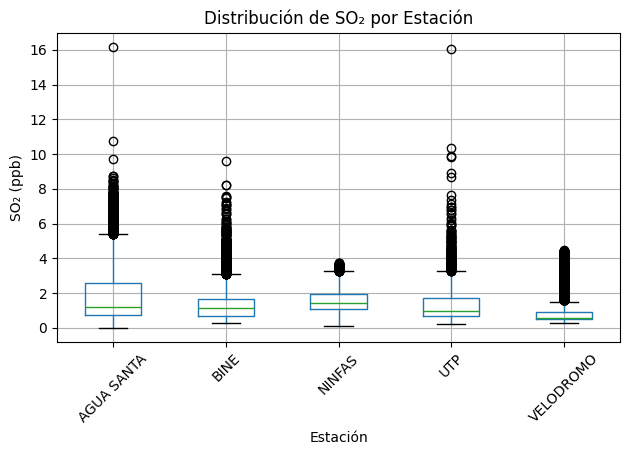

In [3]:
# Filtrar datos no nulos de SO2
so2_data = df.dropna(subset=['SO2'])

# Boxplot por estación para ver la distribución de SO2
plt.figure(figsize=(10, 6))
so2_data.boxplot(column='SO2', by='Estacion')
plt.title('Distribución de SO₂ por Estación')
plt.suptitle('')
plt.xlabel('Estación')
plt.ylabel('SO₂ (ppb)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

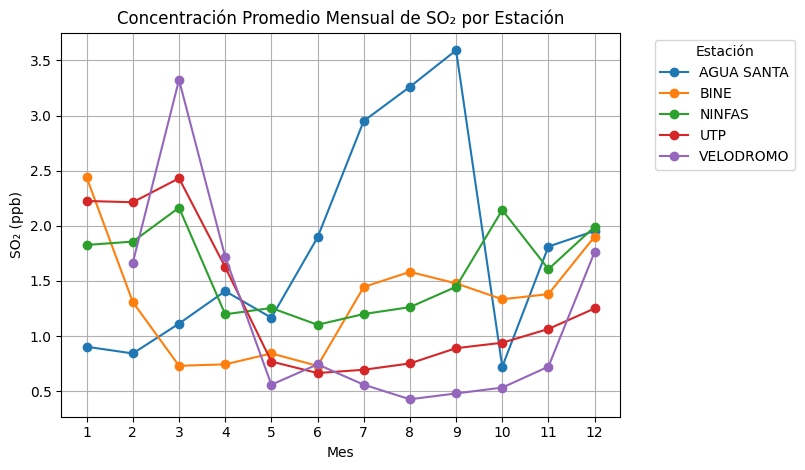

In [5]:
# Agrupar por mes y estación, calculando la media mensual de SO2
monthly_so2 = df.groupby(['Mes', 'Estacion'])['SO2'].mean().unstack()

# Crear gráfico de líneas para la evolución mensual de SO2 por estación
plt.figure(figsize=(12, 6))
monthly_so2.plot(marker='o')
plt.title('Concentración Promedio Mensual de SO₂ por Estación')
plt.xlabel('Mes')
plt.ylabel('SO₂ (ppb)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

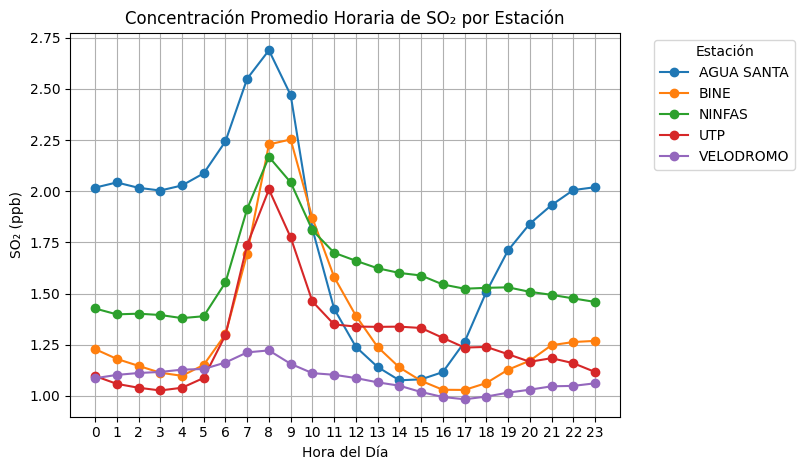

In [6]:
# Agrupar por hora y estación, calculando la media horaria de SO2
hourly_so2 = df.groupby(['Hora', 'Estacion'])['SO2'].mean().unstack()

# Crear gráfico de líneas para la evolución horaria de SO2 por estación
plt.figure(figsize=(12, 6))
hourly_so2.plot(marker='o')
plt.title('Concentración Promedio Horaria de SO₂ por Estación')
plt.xlabel('Hora del Día')
plt.ylabel('SO₂ (ppb)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [14]:
# Umbral alto para SO2 (percentil 95)
so2_threshold = df['SO2'].quantile(0.95)

# Filtrar registros por encima del umbral
high_so2_days = df[df['SO2'] > so2_threshold]

# Agrupar por fecha
high_so2_days['Fecha'] = high_so2_days['DateTime'].dt.date
high_so2_counts = high_so2_days.groupby('Fecha').size()

# Seleccionar los 10 días con más registros elevados de SO2
top_high_so2_days = high_so2_counts.sort_values(ascending=False).head(10)

top_high_so2_days


C:\Users\vicma\AppData\Local\Temp\ipykernel_4496\3002585713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_so2_days['Fecha'] = high_so2_days['DateTime'].dt.date


Fecha
2022-12-07    63
2022-03-20    31
2022-03-19    28
2022-03-26    27
2022-03-21    27
2022-03-18    26
2022-03-16    26
2022-03-17    26
2022-03-12    25
2022-03-10    25
dtype: int64

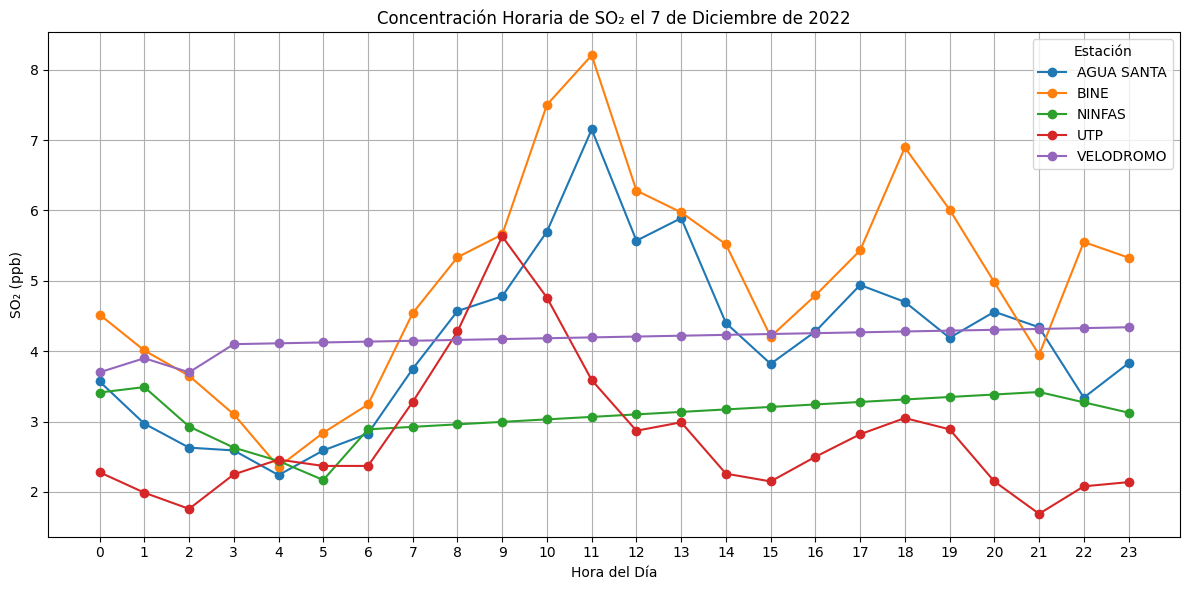

In [16]:
# Seleccionar el día 7 de diciembre
selected_so2_date = pd.to_datetime('2022-12-07')

# Filtrar datos de ese día
selected_so2_data = df[df['DateTime'].dt.date == selected_so2_date.date()]

# Crear gráfico de líneas del SO2 por hora y estación
plt.figure(figsize=(12, 6))
for station in selected_so2_data['Estacion'].unique():
    station_data = selected_so2_data[selected_so2_data['Estacion'] == station]
    plt.plot(station_data['Hora'], station_data['SO2'], marker='o', label=station)

plt.title('Concentración Horaria de SO₂ el 7 de Diciembre de 2022')
plt.xlabel('Hora del Día')
plt.ylabel('SO₂ (ppb)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Estación')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

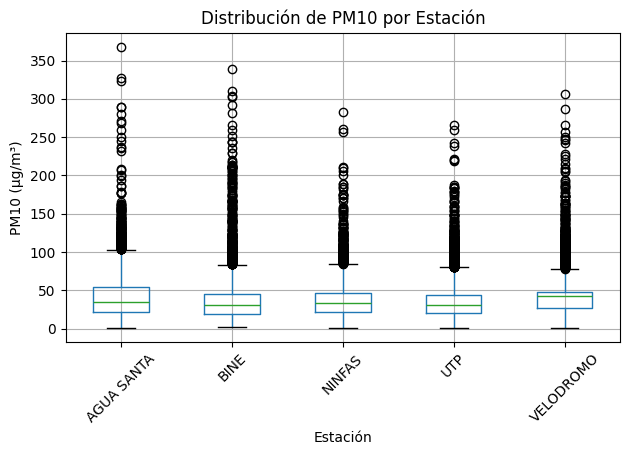

In [17]:
# Filtrar datos no nulos de PM10
pm10_data = df.dropna(subset=['PM10'])

# Boxplot por estación para ver la distribución de PM10
plt.figure(figsize=(10, 6))
pm10_data.boxplot(column='PM10', by='Estacion')
plt.title('Distribución de PM10 por Estación')
plt.suptitle('')
plt.xlabel('Estación')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

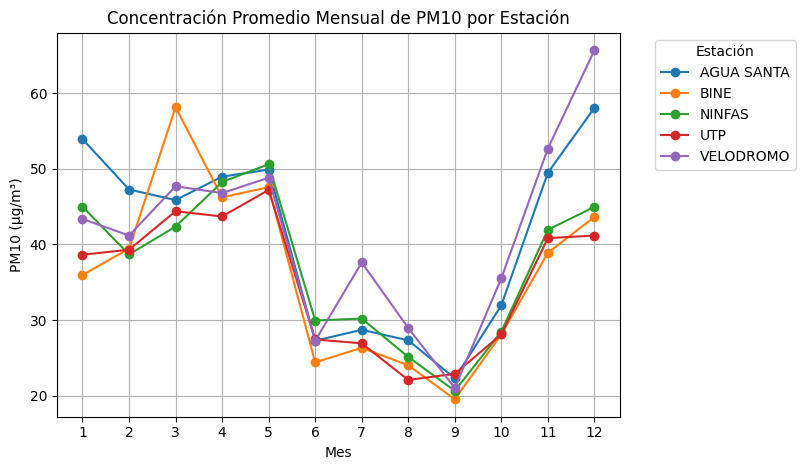

In [18]:
# Agrupar por mes y estación, calculando la media mensual de PM10
monthly_pm10 = df.groupby(['Mes', 'Estacion'])['PM10'].mean().unstack()

# Crear gráfico de líneas para la evolución mensual de PM10 por estación
plt.figure(figsize=(12, 6))
monthly_pm10.plot(marker='o')
plt.title('Concentración Promedio Mensual de PM10 por Estación')
plt.xlabel('Mes')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

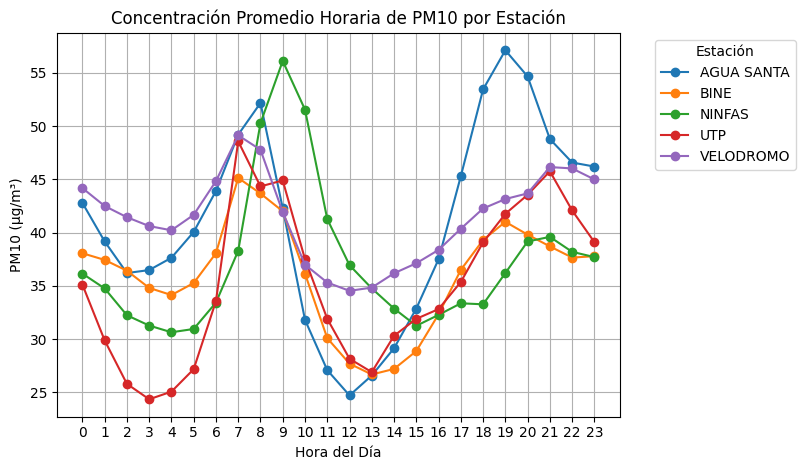

In [20]:
# Agrupar por hora y estación, calculando la media horaria de PM10
hourly_pm10 = df.groupby(['Hora', 'Estacion'])['PM10'].mean().unstack()

# Crear gráfico de líneas para la evolución horaria de PM10 por estación
plt.figure(figsize=(12, 6))
hourly_pm10.plot(marker='o')
plt.title('Concentración Promedio Horaria de PM10 por Estación')
plt.xlabel('Hora del Día')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [21]:
# Umbral alto para PM10 (percentil 95)
pm10_threshold = df['PM10'].quantile(0.95)

# Filtrar registros por encima del umbral
high_pm10_days = df[df['PM10'] > pm10_threshold]

# Agrupar por fecha
high_pm10_days['Fecha'] = high_pm10_days['DateTime'].dt.date
high_pm10_counts = high_pm10_days.groupby('Fecha').size()

# Seleccionar los 10 días con más registros elevados de PM10
top_high_pm10_days = high_pm10_counts.sort_values(ascending=False).head(10)

top_high_pm10_days


C:\Users\vicma\AppData\Local\Temp\ipykernel_4496\3571251014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm10_days['Fecha'] = high_pm10_days['DateTime'].dt.date


Fecha
2022-04-07    55
2022-12-16    46
2022-12-15    45
2022-03-31    42
2022-12-17    40
2022-12-07    39
2022-03-29    39
2022-05-21    38
2022-12-19    36
2022-04-02    33
dtype: int64

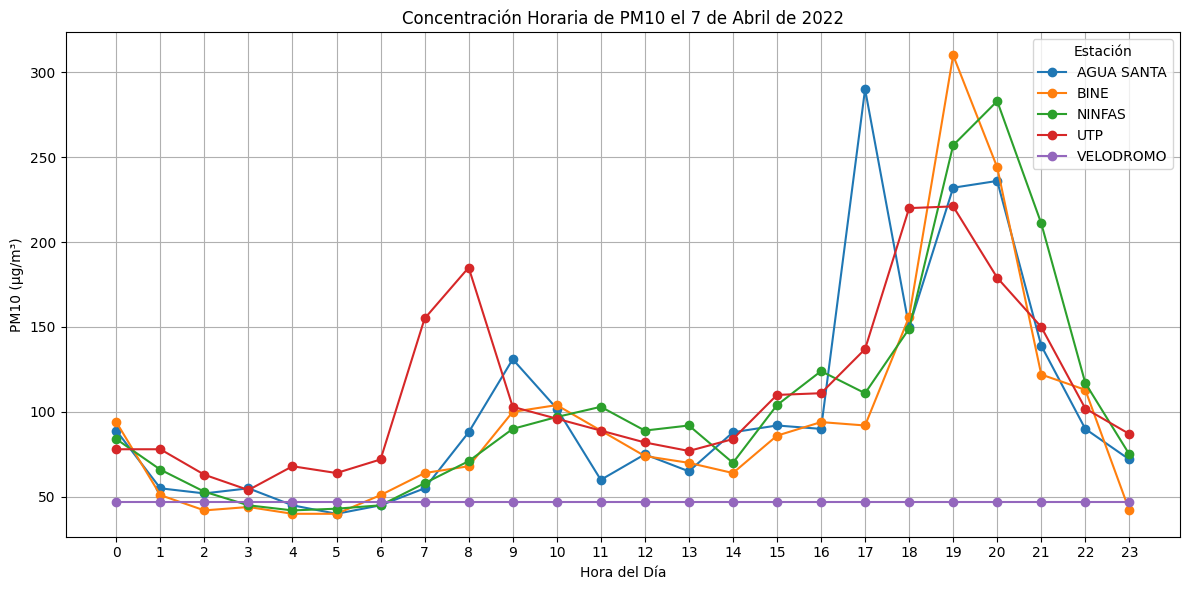

In [23]:
# Seleccionar el día 7 de abril
selected_pm10_date = pd.to_datetime('2022-04-07')

# Filtrar datos de ese día
selected_pm10_data = df[df['DateTime'].dt.date == selected_pm10_date.date()]

# Crear gráfico de líneas del PM10 por hora y estación
plt.figure(figsize=(12, 6))
for station in selected_pm10_data['Estacion'].unique():
    station_data = selected_pm10_data[selected_pm10_data['Estacion'] == station]
    plt.plot(station_data['Hora'], station_data['PM10'], marker='o', label=station)

plt.title('Concentración Horaria de PM10 el 7 de Abril de 2022')
plt.xlabel('Hora del Día')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Estación')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

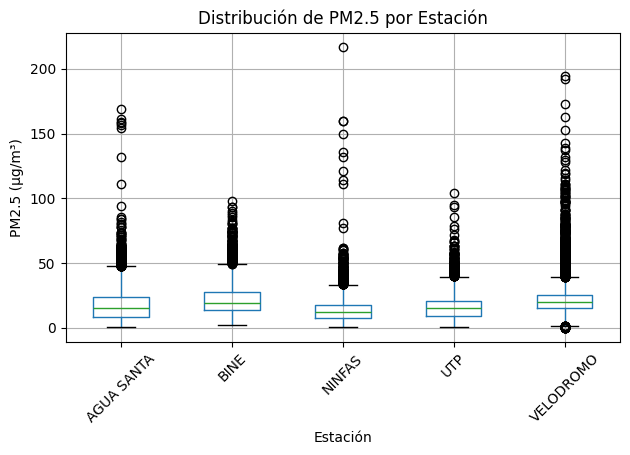

In [24]:
# Filtrar datos no nulos de PM2.5
pm25_data = df.dropna(subset=['PM2.5'])

# Boxplot por estación para ver la distribución de PM2.5
plt.figure(figsize=(10, 6))
pm25_data.boxplot(column='PM2.5', by='Estacion')
plt.title('Distribución de PM2.5 por Estación')
plt.suptitle('')
plt.xlabel('Estación')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

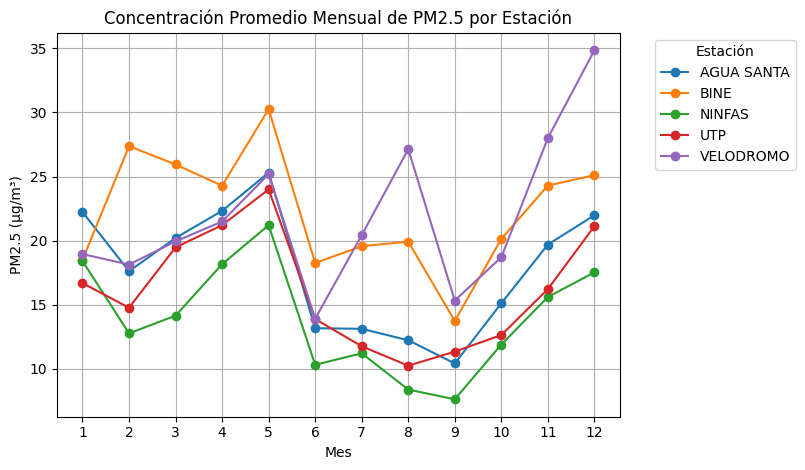

In [26]:
# Agrupar por mes y estación, calculando la media mensual de PM2.5
monthly_pm25 = df.groupby(['Mes', 'Estacion'])['PM2.5'].mean().unstack()

# Crear gráfico de líneas para la evolución mensual de PM2.5 por estación
plt.figure(figsize=(12, 6))
monthly_pm25.plot(marker='o')
plt.title('Concentración Promedio Mensual de PM2.5 por Estación')
plt.xlabel('Mes')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

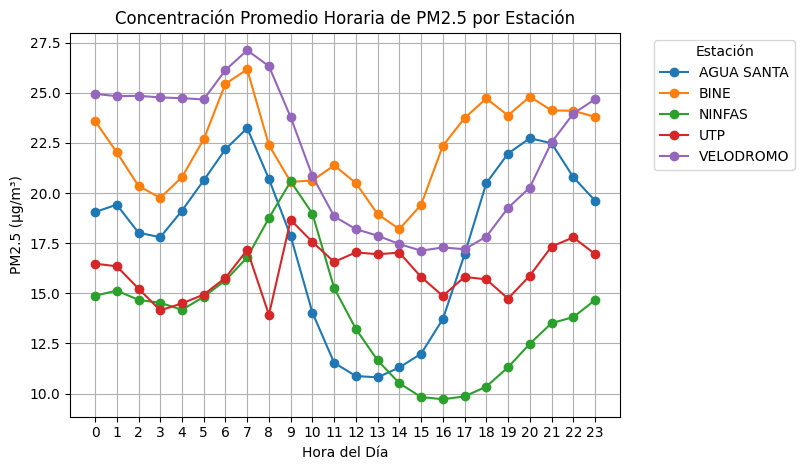

In [27]:
# Agrupar por hora y estación, calculando la media horaria de PM2.5
hourly_pm25 = df.groupby(['Hora', 'Estacion'])['PM2.5'].mean().unstack()

# Crear gráfico de líneas para la evolución horaria de PM2.5 por estación
plt.figure(figsize=(12, 6))
hourly_pm25.plot(marker='o')
plt.title('Concentración Promedio Horaria de PM2.5 por Estación')
plt.xlabel('Hora del Día')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Umbral alto para PM2.5 (percentil 95)
pm25_threshold = df['PM2.5'].quantile(0.95)

# Filtrar registros por encima del umbral
high_pm25_days = df[df['PM2.5'] > pm25_threshold]

# Agrupar por fecha
high_pm25_days['Fecha'] = high_pm25_days['DateTime'].dt.date
high_pm25_counts = high_pm25_days.groupby('Fecha').size()

# Seleccionar los 10 días con más registros elevados de PM2.5
top_high_pm25_days = high_pm25_counts.sort_values(ascending=False).head(10)

top_high_pm25_days


C:\Users\vicma\AppData\Local\Temp\ipykernel_4496\526789905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm25_days['Fecha'] = high_pm25_days['DateTime'].dt.date


Fecha
2022-05-21    59
2022-05-20    56
2022-05-19    55
2022-12-16    42
2022-12-15    41
2022-05-06    40
2022-01-01    37
2022-12-17    37
2022-12-19    35
2022-05-03    32
dtype: int64

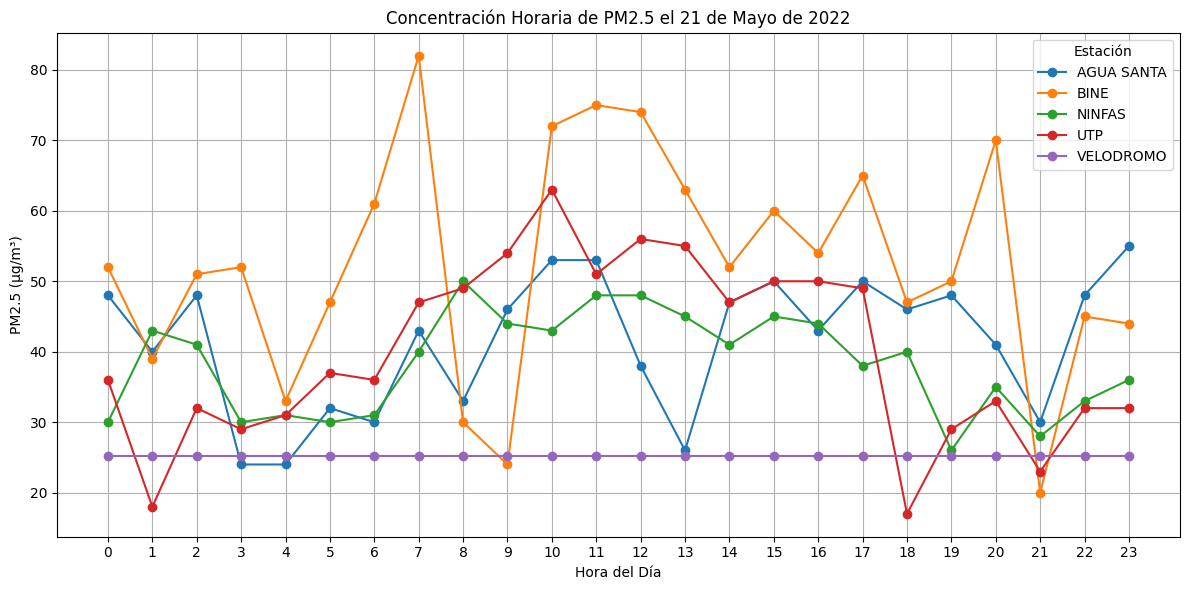

In [30]:
# Seleccionar los datos del 21 de mayo
selected_pm25_date = pd.to_datetime('2022-05-21')
selected_pm25_data = df[df['DateTime'].dt.date == selected_pm25_date.date()]

# Crear gráfico de líneas del PM2.5 por hora y estación
plt.figure(figsize=(12, 6))
for station in selected_pm25_data['Estacion'].unique():
    station_data = selected_pm25_data[selected_pm25_data['Estacion'] == station]
    plt.plot(station_data['Hora'], station_data['PM2.5'], marker='o', label=station)

plt.title('Concentración Horaria de PM2.5 el 21 de Mayo de 2022')
plt.xlabel('Hora del Día')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Estación')
plt.tight_layout()
plt.show()


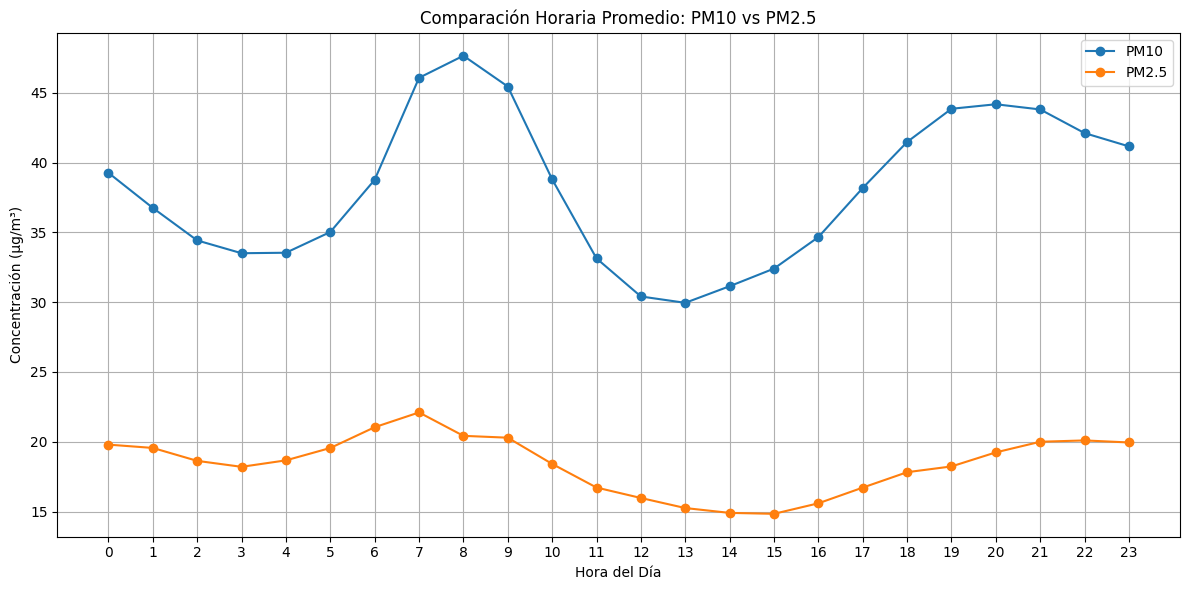

In [31]:
# Agrupar por hora del día, calculando el promedio por contaminante
hourly_comparison = df.groupby('Hora')[['PM10', 'PM2.5']].mean()

# Graficar comparación horaria entre PM10 y PM2.5
plt.figure(figsize=(12, 6))
plt.plot(hourly_comparison.index, hourly_comparison['PM10'], marker='o', label='PM10')
plt.plot(hourly_comparison.index, hourly_comparison['PM2.5'], marker='o', label='PM2.5')
plt.title('Comparación Horaria Promedio: PM10 vs PM2.5')
plt.xlabel('Hora del Día')
plt.ylabel('Concentración (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

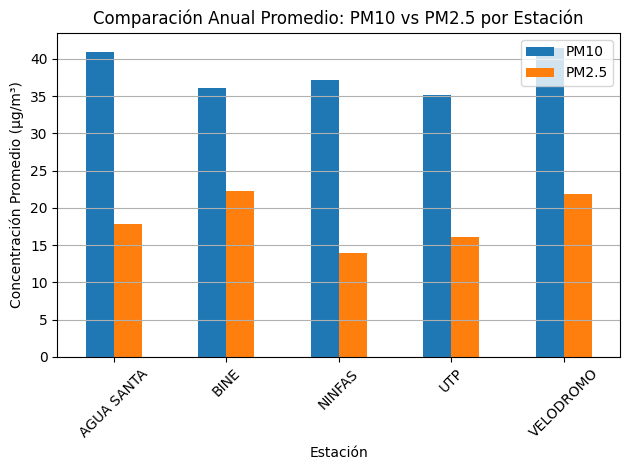

<Figure size 1000x600 with 0 Axes>

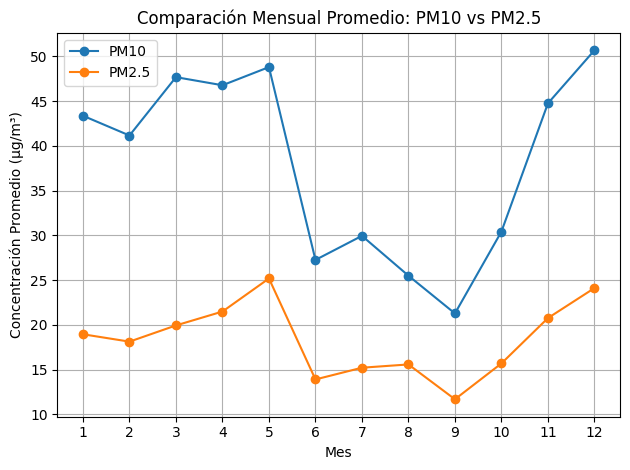

In [33]:
# Agrupar por estación y calcular el promedio anual de PM10 y PM2.5
station_comparison = df.groupby('Estacion')[['PM10', 'PM2.5']].mean()

# Graficar comparación por estación
plt.figure(figsize=(10, 6))
station_comparison.plot(kind='bar')
plt.title('Comparación Anual Promedio: PM10 vs PM2.5 por Estación')
plt.ylabel('Concentración Promedio (µg/m³)')
plt.xlabel('Estación')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agrupar por mes y calcular el promedio mensual de PM10 y PM2.5
monthly_comparison = df.groupby('Mes')[['PM10', 'PM2.5']].mean()

# Graficar comparación por mes
plt.figure(figsize=(10, 6))
monthly_comparison.plot(marker='o')
plt.title('Comparación Mensual Promedio: PM10 vs PM2.5')
plt.ylabel('Concentración Promedio (µg/m³)')
plt.xlabel('Mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


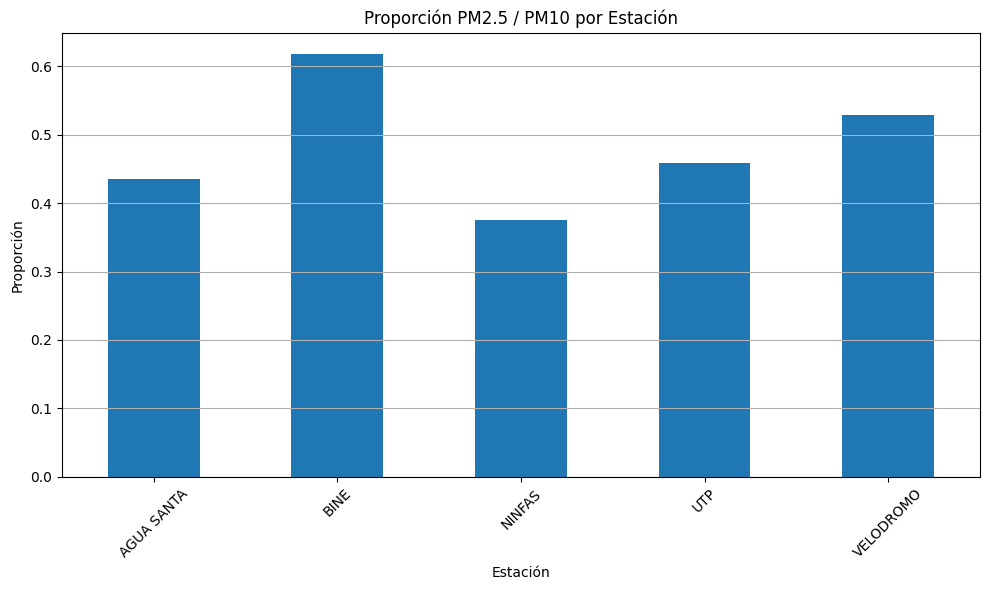

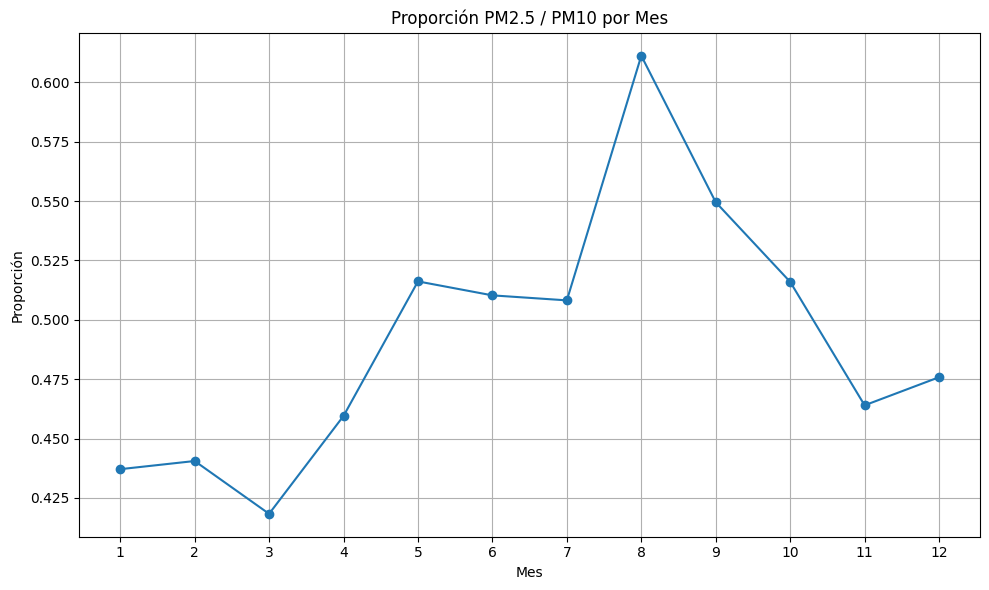

In [34]:
# Calcular proporción PM2.5 / PM10 por estación
station_comparison['Proporcion_PM25_PM10'] = station_comparison['PM2.5'] / station_comparison['PM10']

# Calcular proporción PM2.5 / PM10 por mes
monthly_comparison['Proporcion_PM25_PM10'] = monthly_comparison['PM2.5'] / monthly_comparison['PM10']

# Graficar proporción por estación
plt.figure(figsize=(10, 6))
station_comparison['Proporcion_PM25_PM10'].plot(kind='bar')
plt.title('Proporción PM2.5 / PM10 por Estación')
plt.ylabel('Proporción')
plt.xlabel('Estación')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar proporción por mes
plt.figure(figsize=(10, 6))
monthly_comparison['Proporcion_PM25_PM10'].plot(marker='o')
plt.title('Proporción PM2.5 / PM10 por Mes')
plt.ylabel('Proporción')
plt.xlabel('Mes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()
